## 5. You have been given a dataset demo.csv having independent features as x1, x2, x3, x4, x5, x6, x7 and dependent feature as y with value either 0 or 1. All independent features are continuous data except x1 and x2, which are having nominal data. Now write python program for the following:
### a. Clean independent features
### b. Add one more feature x7 having values between 0 and 1.
### c. Perform scaling
### d. Train this dataset using Logistic regression, Decision Tree and Random Forest.
### Compare the performance of all the models based on accuracy and F1 score.
### e. Draw confusion matrix of each mode

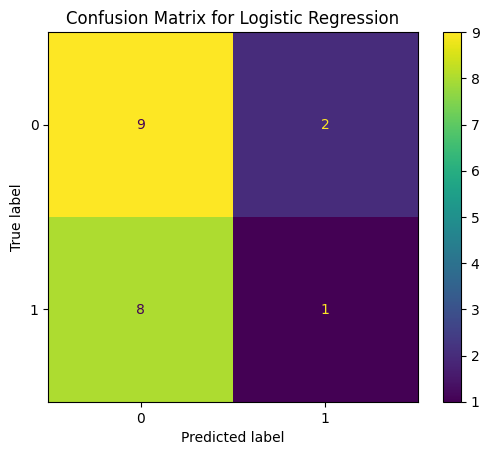

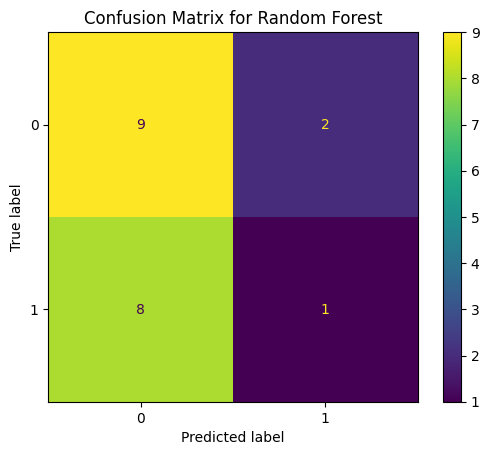

Logistic Regression - Accuracy: 0.5000, F1 Score: 0.1667
Decision Tree - Accuracy: 0.4000, F1 Score: 0.3333
Random Forest - Accuracy: 0.5000, F1 Score: 0.1667


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("demo.csv")

#Clean independent features
# Assuming nominal data in x1 and x2 need encoding
data = pd.get_dummies(data, columns=['x1', 'x2'], drop_first=True)

#Add feature x7 with random values between 0 and 1
data['x7'] = np.random.rand(len(data))

# Separate features and target variable
xs = data.drop('y', axis=1)
y = data['y']


#Perform scaling
scaler = StandardScaler()
xs = pd.DataFrame(scaler.fit_transform(xs), columns=xs.columns)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

# Part d: Train models and compare performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Initialize dictionaries to store evaluation metrics
accuracies = {}
f1_scores = {}
confusion_matrices = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracies[model_name] = accuracy_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

    #Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[model_name], display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Print performance comparison
for model_name in models.keys():
    print(f"{model_name} - Accuracy: {accuracies[model_name]:.4f}, F1 Score: {f1_scores[model_name]:.4f}")
